# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [3]:
# a)
df.info()

# b)
print(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1      

Step 3 - Write code to remove Pregnancy column 

In [10]:
df = df.drop(columns=['Pregnancies'])
print(df.columns)






Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')


Step 4 - Write code to display info of dataset and check shape of dataset.

In [11]:
# Show column names, data types, and non-null counts
df.info()

# Show number of rows and columns
print("Shape of dataset:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
Shape of dataset: (768, 8)


Step 5 - Write code to clean data

In [15]:


columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)
df[columns_to_clean] = df[columns_to_clean].fillna(df[columns_to_clean].median())

print(df.head())
print((df[columns_to_clean] == 0).sum())



   Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0  148.000         72.000         35.000  125.000 33.600                     0.627   50        1
1   85.000         66.000         29.000  125.000 26.600                     0.351   31        0
2  183.000         64.000         29.000  125.000 23.300                     0.672   32        1
3   89.000         66.000         23.000   94.000 28.100                     0.167   21        0
4  137.000         40.000         35.000  168.000 43.100                     2.288   33        1
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (614, 7)
Testing set size: (154, 7)


#### **Step #7: Initialize your model**




In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()




#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [20]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model training complete. Predictions made on test data.")
print("First 10 predictions:", y_pred[:10])


Model training complete. Predictions made on test data.
First 10 predictions: [0 0 0 0 1 0 0 0 1 1]


Step 9 - Predict using model on test data

In [21]:
y_pred = model.predict(X_test)
print("Predictions on test data:")
print(y_pred)


Predictions on test data:
[0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0]


Step 10 -  Find accuracy of model

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Accuracy of the model: 0.7597402597402597


Step 11 - Confusion Matrix

Confusion Matrix:
 [[81 18]
 [19 36]]


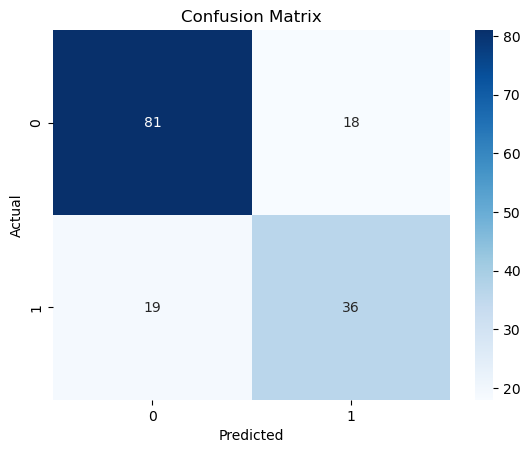

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()